<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-и-заполнение-пропусков-в-данных" data-toc-modified-id="Исследование-и-заполнение-пропусков-в-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование и заполнение пропусков в данных</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Редкие-и-выбивающиеся-значения" data-toc-modified-id="Редкие-и-выбивающиеся-значения-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Редкие и выбивающиеся значения</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span></li><li><span><a href="#Средняя-цена-квадратного-метра" data-toc-modified-id="Средняя-цена-квадратного-метра-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Средняя цена квадратного метра</a></span></li><li><span><a href="#Анализ-изменения-цены-по-степени-удалённости-от-центра" data-toc-modified-id="Анализ-изменения-цены-по-степени-удалённости-от-центра-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ изменения цены по степени удалённости от центра</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('real_estate_data.csv')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
df.shape

(23699, 22)

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Во многих столбцах есть пропущенные или некорректно отображающиеся значения, в таком количестве они могут значительно повлиять на результаты исследования, поэтому нужно разобраться в причинах их возникновения и по возможности заполнить пропуски.

## Предобработка данных

### Исследование и заполнение пропусков в данных

    * ceiling_height: можно заменить на медиану или можно заменить на медиану, полученную в результате группировки по локации и этажности
    * floors_total: проверю долю пропусков и удалю, если их меньше 10%
    *living_area: можно по медианному отношению жилой площади к общей и изветсной общей площади вычислить жилую
    *is_apartment: можно предположить, что все NaN означают, что объект не является апартаментами, и заменить на False
    *kitchen_area: аналогично Living_area, либо заменить на 0, если студия
    *balcony: если не указано число балконов, можно предположить, что их нет, и заменить пропуски на 0
    *airports_nearest
    *cityCenters_nearest: можно заменить медианным через группировку по населённым пунктам
    *parks_around3000: возможно, парков поблизости нет; можно заменить на 0
    *parks_nearest: т.к. эти данные не влияют на результаты исследования и я не могу предположить логичной замены пропусков, оставлю их как есть
    *ponds_around3000: по аналогии с парками     
    *ponds_nearest: аналогично parks_nearest       
    *days_exposition
    
Много пропусков есть в данных, которые получены автоматически на основе картографических данных, значит есть проблема в том, как работает эта система (например, даже если есть информация о том, что в радиусе 3 км есть пруд/парк, нет данных, на каком расстоянии они находятся).  

In [9]:
new_area1 = df.dropna(subset=['living_area'])
new_area1_median = (new_area1['living_area']/new_area1['total_area']).median()
df['living_area'].fillna(df['total_area']*new_area1_median, inplace = True) 
df['living_area'].isna().sum()

0

In [10]:
df['is_apartment'].fillna(False, inplace = True)
df['is_apartment'].isna().sum()

0

In [11]:
new_area2 = df.dropna(subset=['kitchen_area'])
new_area2_median = (new_area2['kitchen_area']/new_area2['total_area']).median()
df['kitchen_area'].fillna(df['total_area']*new_area1_median, inplace = True) 
df['kitchen_area'].isna().sum()

#df['kitchen_area']=df['kitchen_area'].fillna(df.groupby('total_area', 'is_apartment')['kitchen_area'].transform('median'), inplace=True)
#я хотела для каждой квартиры проверить, является ли она апартаментами, и соответственно заполнить пропсук либо о, либо средним значением
#пыталась через цикл и через transform, но каждый раз была ошибка


0

In [12]:
#считаем долю пропусков в floors_total
df['floors_total'].isna().sum()/df['floors_total'].count()
#т.к. доля пропусков небольшая, можно их удалить
df = df.dropna(subset=['floors_total'])
df['floors_total'].isna().sum()

0

In [13]:
new_height = df.dropna(subset=['ceiling_height'])
new_height = new_height.pivot_table(index=['locality_name', 'floors_total'], values='ceiling_height', aggfunc='median')
new_height = new_height.reset_index()



#for index, row in new_height.iterrows():
    #for index1, dom in df[(df['locality_name'] == row['locality_name']) & (df['floors_total'] == row['floors_total']) & (df['ceiling_height'].isna())].iterrows():
        #df.loc[[index1]]['ceiling_height'] = row['ceiling_height']
        
#df.info()
df1 = df.merge(new_height,on=['locality_name','floors_total'])
df['ceiling_height'].fillna(df1['ceiling_height_y'], inplace = True)
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace = True)
df['ceiling_height'].isna().sum()


#df['ceiling_height'].fillna(df.groupby(['locality_name', 'floors_total'].transform('median')))
#df[ceiling_height].value_counts()

0

In [14]:
#заполним пропуски в столбце с расстоянием до центра и переведм в км
center = df.dropna(subset=['cityCenters_nearest'])
center = center.pivot_table(index=['locality_name'], values='cityCenters_nearest', aggfunc='median')
center = center.reset_index()

df2 = df.merge(center, on='locality_name')
df['cityCenters_nearest'].fillna(df2['cityCenters_nearest_y'], inplace=True)
df = df.dropna(subset=['cityCenters_nearest'])
df['cityCenters_nearest'].isna().sum()/df['cityCenters_nearest'].count()
df['cityCenters_nearest'].head()
df['cityCenters_nearest'] = round(df['cityCenters_nearest']/1000)
df['cityCenters_nearest'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenters_nearest, dtype: float64

In [15]:
#также переведу цену в млн
df['last_price'] = df['last_price']/1000000
df['last_price'].head()

0    13.000
1     3.350
2     5.196
3    64.900
4    10.000
Name: last_price, dtype: float64

In [16]:
df['is_apartment'].fillna(False, inplace = True)
df['is_apartment'].isna().sum()

0

In [17]:
df['balcony'].fillna(0, inplace = True)
df['balcony'].isna().sum()

0

In [18]:
df['parks_around3000'].fillna(0)

0        1.0
1        0.0
2        1.0
3        2.0
4        2.0
        ... 
23690    1.0
23691    0.0
23693    1.0
23694    1.0
23697    2.0
Name: parks_around3000, Length: 22257, dtype: float64

In [19]:
df['ponds_around3000'].fillna(0)

0        2.0
1        0.0
2        2.0
3        3.0
4        1.0
        ... 
23690    0.0
23691    1.0
23693    1.0
23694    3.0
23697    3.0
Name: ponds_around3000, Length: 22257, dtype: float64

In [20]:
df['days_exposition'].fillna(df['days_exposition'].median(), inplace = True)
df['days_exposition'].isna().sum()

0

Создадим новый датафрейм, из которого можно исключить те столбцы, в которых большее количество пропусков и которые в то же время не понадобятся для этого исследования (парки, пруды, аэропорты). Строки с пропусками в столбце locality_name также придётся отбросить, потому что они не информативны

In [21]:
data = df.drop(['parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'airports_nearest'], axis=1)

In [22]:
data.dropna(subset=['locality_name'], inplace=True)
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
cityCenters_nearest     0
days_exposition         0
dtype: int64

### Изменение типов данных

In [23]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'cityCenters_nearest', 'days_exposition'],
      dtype='object')

Изменение типов данных:
    типы значений в столбцах, которые обозначают цену, число (балконов, комнатю etc.) или расстояние до других объектов в м, можно заменить на int, чтобы отбросить дробную часть
    first_day_exposition - заменить тип данных с помощью to_datetime


In [24]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
cityCenters_nearest     0
days_exposition         0
dtype: int64

In [25]:
#КОД РЕВЬЮЕРА

import numpy as np

display(data.dtypes)

data = data.astype({
    'floors_total': np.int64,
    'balcony': np.int64,
    'last_price': np.int64,
    'days_exposition': np.int64,
    'rooms': np.int64})

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['locality_name'].astype('string')

print('После изменения типов данных')
display(data.dtypes)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
cityCenters_nearest     float64
days_exposition         float64
dtype: object

После изменения типов данных


total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
cityCenters_nearest            float64
days_exposition                  int64
dtype: object

## Расчёты и добавление результатов в таблицу

In [26]:
data['price_per_square_meter']=data['last_price']*1000000/data['total_area']

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#достанем нужные компоненты (день, месяц и год) в отдельные столбцы
data['week_day']=data['first_day_exposition'].dt.dayofweek
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year

data['floor'].value_counts()
def floor_type (row):
    floor=row['floor']
    floors_total=row['floors_total']
    if floor==1:
        return 'первый'
    if floor==floors_total:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)


data['living_to_total'] = data['living_area']/data['total_area'] 
data['kitchen_to_total'] = data['kitchen_area']/data['total_area']

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,cityCenters_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_type,living_to_total,kitchen_to_total
0,20,13,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,Санкт-Петербург,16.0,96,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3,40.4,2018-12-04,1,2.70,11,18.600000,1,False,...,посёлок Шушары,19.0,81,74257.425743,1,12,2018,первый,0.460396,0.272277
2,10,5,56.0,2015-08-20,2,2.70,5,34.300000,4,False,...,Санкт-Петербург,14.0,558,89285.714286,3,8,2015,другой,0.612500,0.148214
3,0,64,159.0,2015-07-24,3,2.70,14,90.289724,9,False,...,Санкт-Петербург,7.0,424,402515.723270,4,7,2015,другой,0.567860,0.567860
4,2,10,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,Санкт-Петербург,8.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000


Вывод: пропуски заполнены или удалены, в новом датасете остались только те данные, которые будут нужны для исследования.

## Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

(0.0, 400.0)

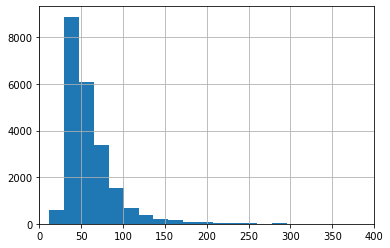

In [27]:
data['total_area'].hist(bins=50).set_xlim([0, 400])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763.0,400.0,2017-09-30T00:00:00,7,2.6,10.0,250.0,10,False,...,227.14396,2.0,Санкт-Петербург,25108.0,4.0,1.0,530.0,3.0,756.0,33.0


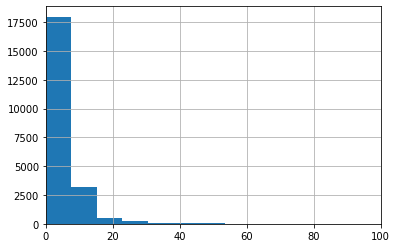

In [28]:
data['last_price'].hist(bins=100).set_xlim([0, 100])
very_high_price = df.query('last_price>500')
very_high_price

Стоимость в 763 млн похожа на аномалию, но я решила от неё не избавляться

(0.0, 50.0)

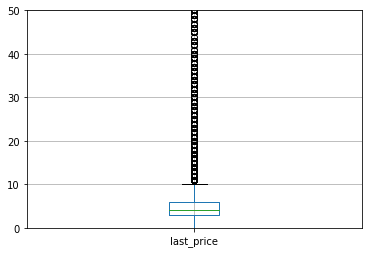

In [29]:
data.boxplot('last_price').set_ylim([0, 50])

Так выглядит график после перевода цены в млн

<AxesSubplot:>

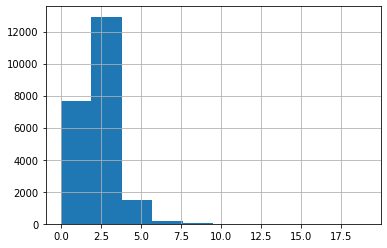

In [30]:
data['rooms'].hist(bins=10)

(0.0, 20.0)

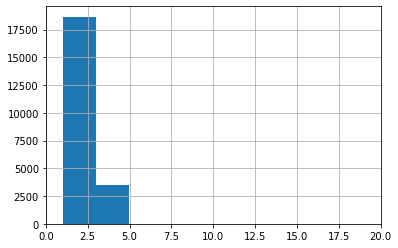

In [31]:
data['ceiling_height'].hist(bins=50).set_xlim([0, 20])

169.67957144143332
96.0


<AxesSubplot:>

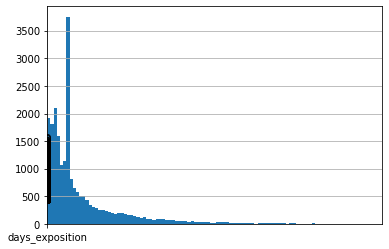

In [32]:
data['days_exposition'].hist(bins=100)
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

data.boxplot('days_exposition')

### Редкие и выбивающиеся значения

Можно оценить и отбросить нетипично долгое время продажи (это участок, где гистограмма почти сливается с нулём). Скорее всего, такие аномальные значения связаны с какой-то ошибкой (например, объявление забыли снять с публикации). В среднем, квартира продаётся за 2-6 месяцев. Vожно отбросить объявления, которые на графике boxplot попадают в зону выбросов ('days_exposition'>500)

### Факторы, влияющие на стоимость квартиры

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Text(0, 0.5, 'Средняя цена')

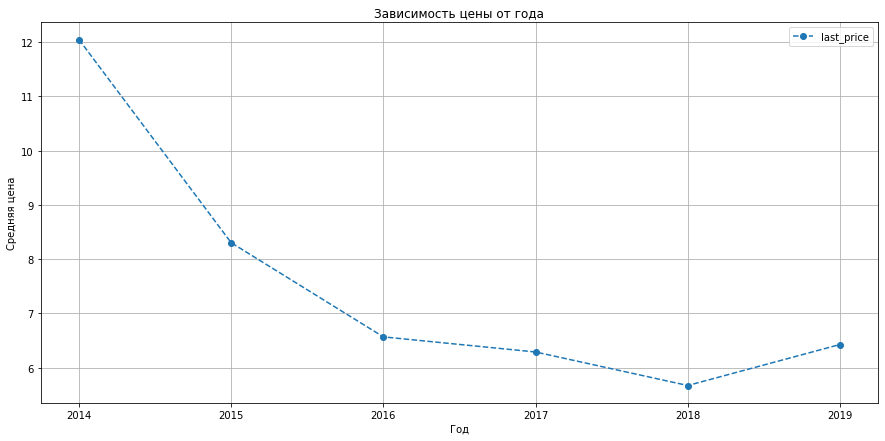

In [33]:
import matplotlib.pyplot as plt

data.pivot_table(index='year', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Средняя цена')

Здесь меня сначало удивило, что цены на недвижимость вообще могли опуститься, но материалы РБК тоже подсказывают, что в 2014 было падение рынка жилья)

Text(0, 0.5, 'Средняя цена')

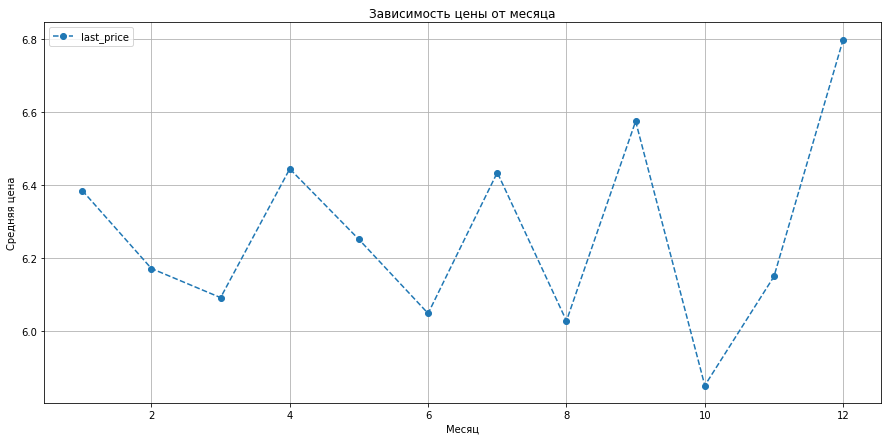

In [34]:
data.pivot_table(index='month', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')

Почему-то дешевле всего квартиры продаются в октябре, а дороже - в декабре

Text(0, 0.5, 'Средняя цена')

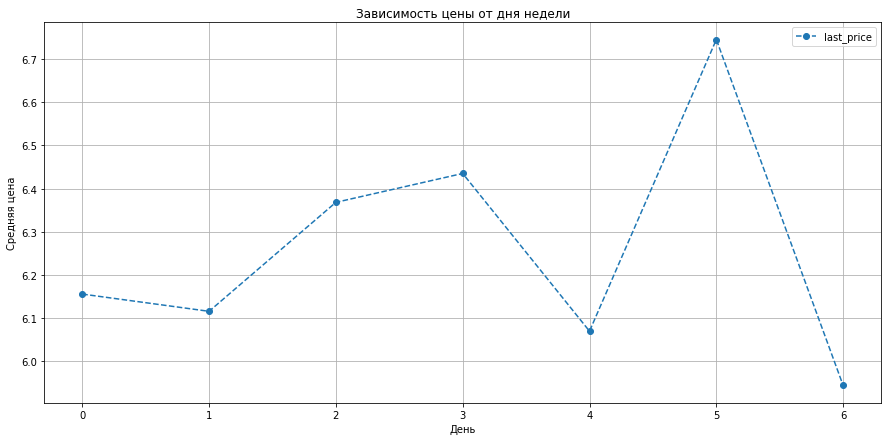

In [35]:
data.pivot_table(index='week_day', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от дня недели')
plt.xlabel('День')
plt.ylabel('Средняя цена')

Номера дней отсчитываются с понедельника (1), а воскресенье - это 0. Соответственно, дороже всего квартиры продаются в пятницу, а дешевле всего в субботу. Могу только предположить, что в пятницу у покупателей хорошее настроение, а в субботу у них болит голова

Text(0, 0.5, 'Средняя цена')

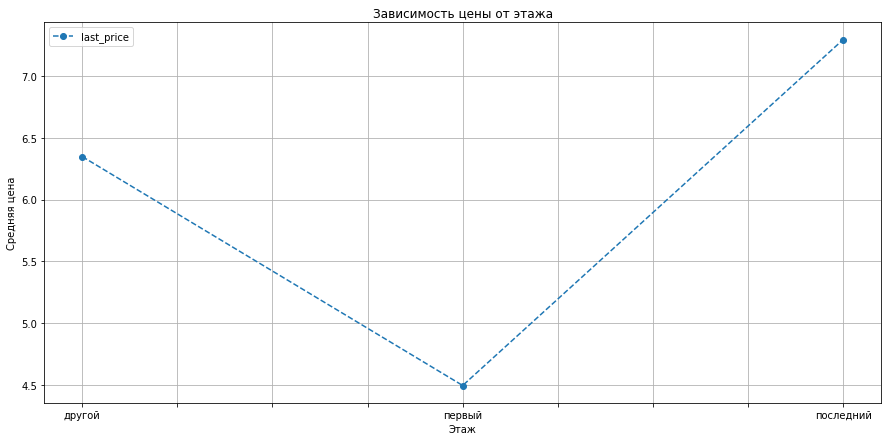

In [36]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Средняя цена')

Дешевле всего квартиры на первом этаже, дороже - на последнем, возможно, это связано с тем, что никто не любит шумных соседей сверху)

Text(0, 0.5, 'Средняя цена')

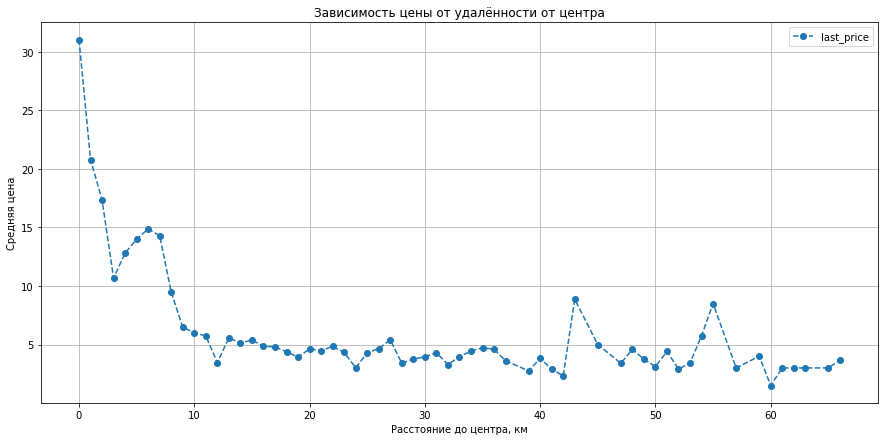

In [37]:
data.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от удалённости от центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена')

В целом, чем дальше от центра - тем дешевле, но есть ещё небольшой пик в районе 7 км от центра.

Text(0, 0.5, 'Средняя цена')

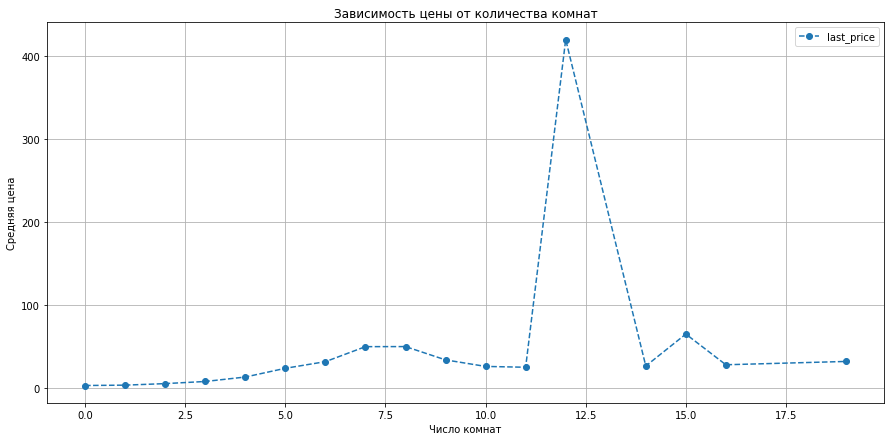

In [38]:
data.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от количества комнат')
plt.xlabel('Число комнат')
plt.ylabel('Средняя цена')

In [39]:
data['rooms'].unique()
null_room = 0
for i in data['rooms']:
    if i==0:
        null_room+=1
null_room       
#оказалось, что есть ещё квартиры, в которых количество комнат равно 0
data0 = data[data['rooms']==0]
data0.head(10)
#я предполагаю, что это студии, т.к. отношение площади кухни к жилой заполнилось средним значением

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,cityCenters_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_type,living_to_total,kitchen_to_total
144,1,2,27.00,2017-03-30,0,2.70,24,15.500000,2,False,...,посёлок Мурино,12.0,181,74074.074074,3,3,2017,другой,0.574074,0.56786
349,4,2,25.00,2017-09-27,0,2.70,14,17.000000,1,False,...,деревня Кудрово,12.0,45,80000.000000,2,9,2017,первый,0.680000,0.56786
440,8,2,27.11,2018-03-12,0,2.70,17,24.750000,4,False,...,Санкт-Петербург,15.0,64,73773.515308,0,3,2018,другой,0.912947,0.56786
508,0,3,34.40,2017-03-28,0,2.70,26,24.300000,19,False,...,посёлок Парголово,19.0,430,87209.302326,1,3,2017,другой,0.706395,0.56786
608,2,1,25.00,2019-02-20,0,2.70,10,14.196497,7,False,...,посёлок Шушары,12.0,29,40000.000000,2,2,2019,другой,0.567860,0.56786
697,12,2,24.10,2017-12-01,0,2.75,25,17.500000,21,False,...,деревня Кудрово,12.0,201,82987.551867,4,12,2017,другой,0.726141,0.56786
716,5,1,17.00,2017-06-07,0,2.70,9,12.000000,1,False,...,посёлок Шушары,30.0,40,58823.529412,2,6,2017,первый,0.705882,0.56786
780,9,2,26.10,2018-02-20,0,2.70,18,14.821143,8,False,...,посёлок Мурино,12.0,45,76628.352490,1,2,2018,другой,0.567860,0.56786
839,14,1,35.00,2017-04-14,0,2.70,5,15.000000,3,False,...,поселок Новый Свет,12.0,7,28571.428571,4,4,2017,другой,0.428571,0.56786
946,5,2,23.00,2016-09-27,0,2.70,27,18.000000,7,False,...,посёлок Мурино,12.0,483,86956.521739,1,9,2016,другой,0.782609,0.56786


In [40]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [41]:
data[data['rooms']>10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,cityCenters_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_type,living_to_total,kitchen_to_total
648,3,17,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,Санкт-Петербург,3.0,96,92542.188351,6,7,2018,последний,0.755580,0.072401
866,5,25,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,Санкт-Петербург,8.0,418,68870.523416,5,12,2017,другой,0.611570,0.045730
5358,20,65,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,Санкт-Петербург,5.0,14,110169.491525,3,2,2019,другой,0.693220,0.169492
9688,8,33,194.1,2017-02-07,11,3.43,5,129.0,2,False,...,Санкт-Петербург,1.0,813,170015.455951,1,2,2017,другой,0.664606,0.061309
14498,6,32,374.6,2018-06-09,19,2.50,5,264.5,2,False,...,Санкт-Петербург,4.0,114,85424.452750,5,6,2018,другой,0.706086,0.073679
18848,6,28,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,Санкт-Петербург,4.0,1365,103703.703704,0,3,2015,последний,0.666667,0.048148
19540,8,420,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,Санкт-Петербург,8.0,106,466666.666667,2,12,2017,последний,0.455222,0.124444
20829,6,28,245.4,2016-03-31,14,3.20,4,168.3,2,False,...,Санкт-Петербург,2.0,95,114099.429503,3,3,2016,другой,0.685819,0.105542


Вообще, я могу предположить, что в квартире может быть и 10 комнат, а больше уже трудно представить) Но таких значений всё равно немного, поэтому решила оставить как есть

Text(0, 0.5, 'Средняя цена')

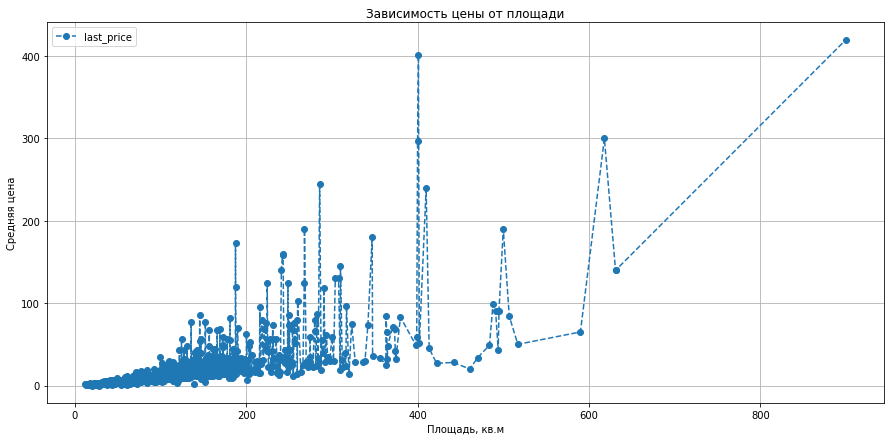

In [42]:
data.pivot_table(index='total_area', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от площади')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Средняя цена')

### Средняя цена квадратного метра
Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

,index,locality_name,count,mean
,,,price_per_square_meter,price_per_square_meter
0,33,Санкт-Петербург,15632,105466.200210
1,296,посёлок Шушары,439,68624.353908
2,263,посёлок Мурино,392,73039.593289
3,32,Пушкин,368,93962.815866
4,13,Колпино,337,65229.783037
5,267,посёлок Парголово,327,79097.535963
6,3,Всеволожск,293,57819.038838
7,6,Гатчина,245,57655.709805
8,86,деревня Кудрово,217,80036.880158


<AxesSubplot:xlabel='locality_name', ylabel="('mean', 'price_per_square_meter')">

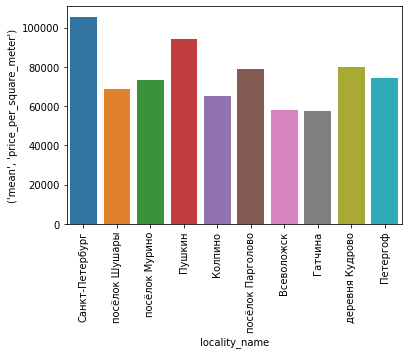

In [43]:
df_rating = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
df_rating = df_rating.reset_index()
df_rating.columns
rating_table = df_rating.sort_values(by=('count', 'price_per_square_meter'), ascending=False).head(10).reset_index()
display(rating_table)
rating_table.columns
pic = sns.barplot(data=rating_table, x='locality_name', y= ('mean', 'price_per_square_meter'))
for item in pic.get_xticklabels():
    item.set_rotation(90)
pic    

Самая высокая стоимость жилья в Санкт-Петербурге и Пушкине, самая низкая - в Выборге.

### Анализ изменения цены по степени удалённости от центра

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [44]:
spb = data[data['locality_name'] =='Санкт-Петербург'].reset_index()
spb['cityCenters_nearest'] = round(spb['cityCenters_nearest'])

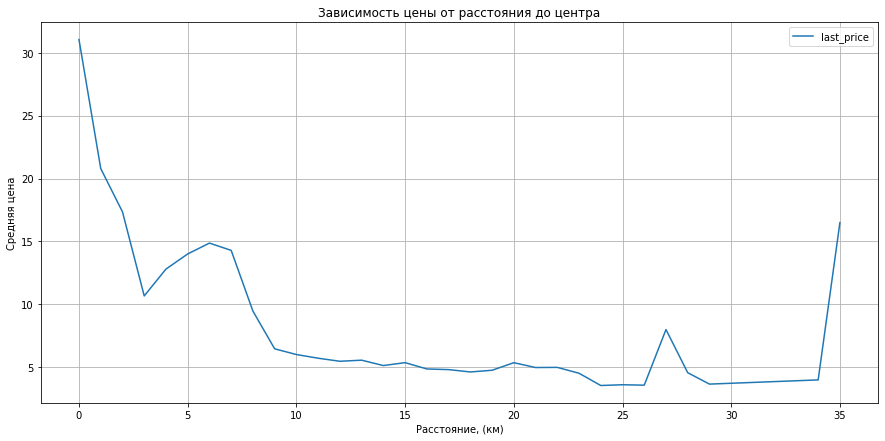

In [45]:
spb.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(grid=True, figsize=(15, 7))

plt.title('Зависимость цены от расстояния до центра')
plt.xlabel('Расстояние, (км)')
plt.ylabel('Средняя цена')

None #убирает лишнюю строку над графиком

Центр заканчивается примерно на расстоянии 8-10 км

(0.0, 500.0)

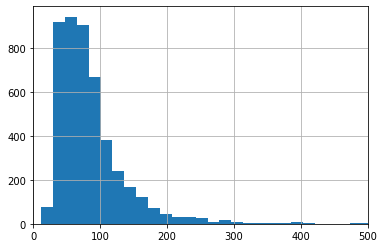

In [46]:
spb_centre = spb[spb['cityCenters_nearest']<10].reset_index()
spb_centre['total_area'].hist(bins=50).set_xlim([0, 500]) 

(0.0, 200.0)

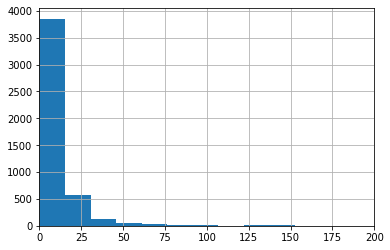

In [47]:
spb_centre['last_price'].hist(bins=50).set_xlim([0, 200])

<AxesSubplot:>

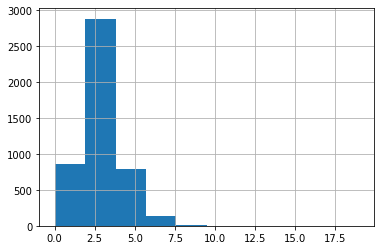

In [48]:
spb_centre['rooms'].hist(bins=10)

(0.0, 10.0)

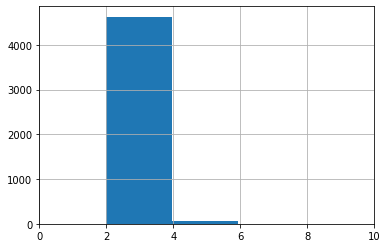

In [49]:
spb_centre['ceiling_height'].hist(bins=50).set_xlim([0, 10])

Text(0, 0.5, 'Средняя цена')

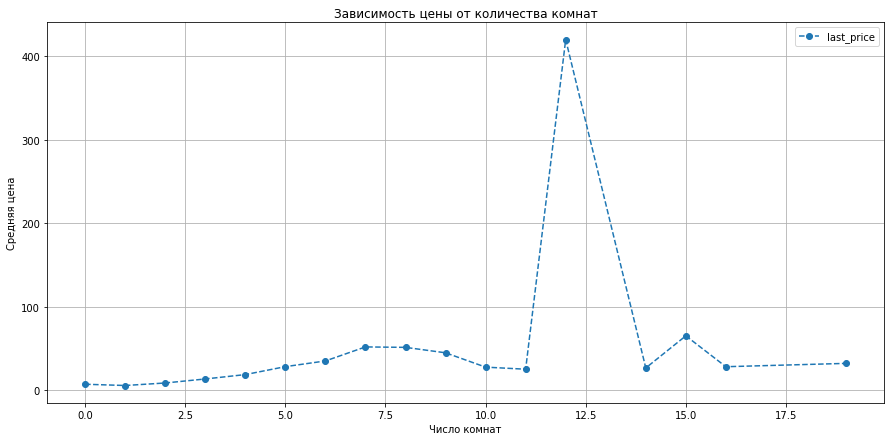

In [50]:
spb_centre.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от количества комнат')
plt.xlabel('Число комнат')
plt.ylabel('Средняя цена')

Text(0, 0.5, 'Средняя цена')

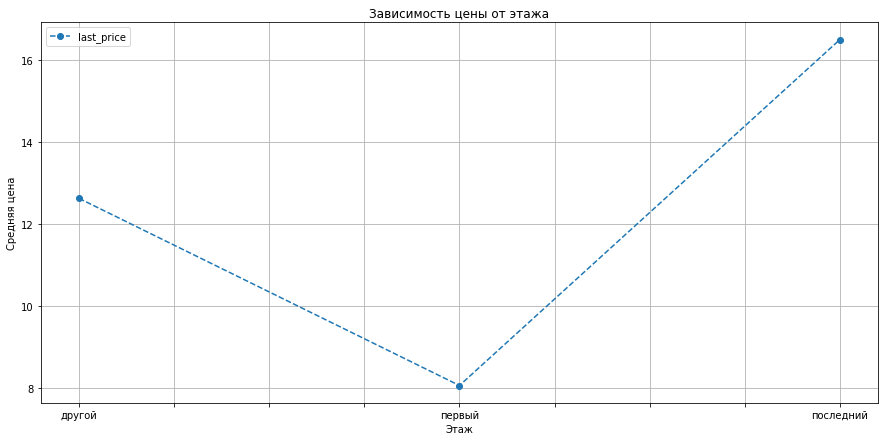

In [51]:
spb_centre.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Средняя цена')

Text(0, 0.5, 'Средняя цена')

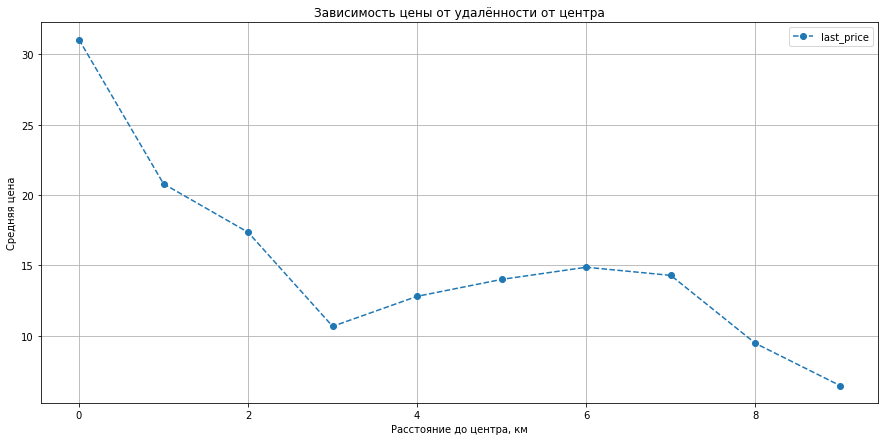

In [52]:
spb_centre.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от удалённости от центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена')

Text(0, 0.5, 'Средняя цена')

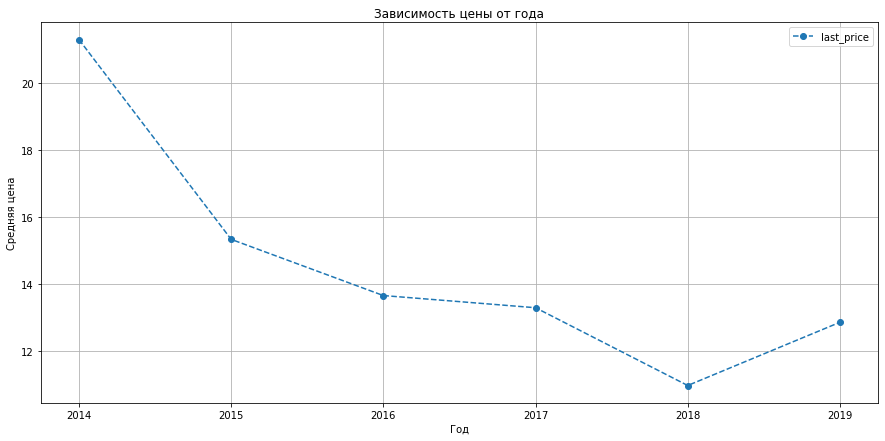

In [53]:
spb_centre.pivot_table(index='year', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Средняя цена')

Text(0, 0.5, 'Средняя цена')

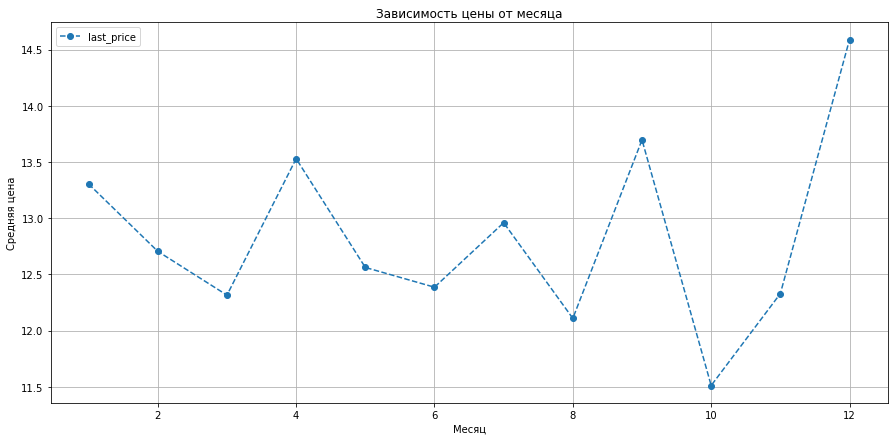

In [54]:
spb_centre.pivot_table(index='month', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')

Text(0, 0.5, 'Средняя цена')

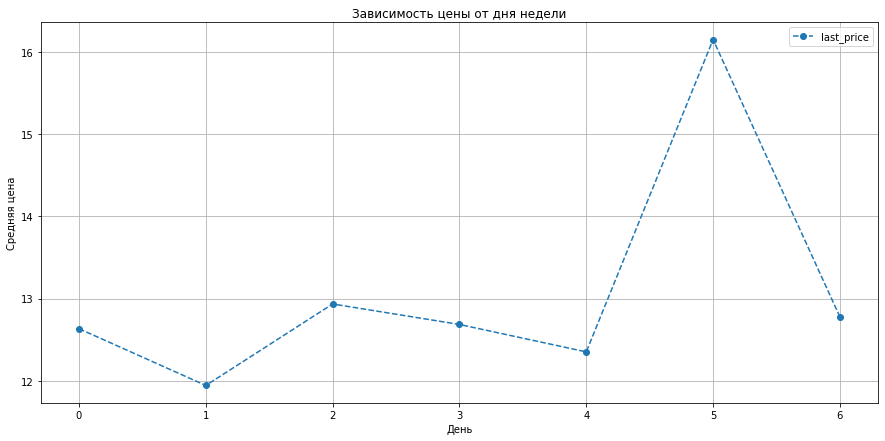

In [55]:
spb_centre.pivot_table(index='week_day', values='last_price', aggfunc='mean').plot(style='o--', grid=True, figsize=(15, 7))

plt.title('Зависимость цены от дня недели')
plt.xlabel('День')
plt.ylabel('Средняя цена')

### Вывод
Выводы незначительно отличаются от выводов по всему датасету, с поправкой на то, что средняя цена выше. Зависимость от расстояния до центра примерно такая же, цена уменьшается с увеличением расстояния и есть небольшой пик в районе 6 км от центра

## Общий вывод

Самая большая корреляция наблюдается между ценой и площадью квартиры, а также ценой и расстоянием до центра. Завимсимость цены от дня недели и месяца не такая значительная, если смотреть на зависимость от года, можно предположить, что в 2014 случилось падение рынка недвижимости. Есть также зависимость между числом и ценой комнат, если отбросить 11-комнатную кввартиру с аномально высокой ценой (больше 400 млн), то останется просто прямая корреляция. Закономерности по сегменту квартир в центре Петербурга в целом такие же, как и по всему датасету, только, если рассматривать зависимость цены от расстояния до центра, второе пиковое значение находится немного ближе к центру